# **Social Media Sentiments Analysis**

![](https://storage.googleapis.com/kaggle-datasets-images/4245661/7316345/e6d20ba8f620d0f86db1715f2de3f540/dataset-card.png?t=2024-01-01-07-10-21)

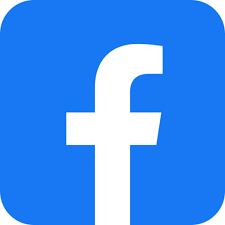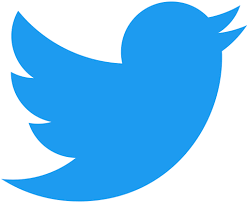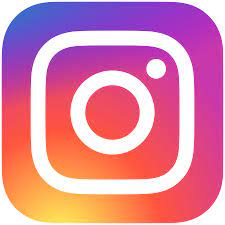

## **Goal of the Project:** In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for.

## Import Libraries

In [6]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [8]:
df.shape

(732, 15)

In [9]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [10]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [11]:
df.isnull().sum()

,0
Id,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0


In [12]:
df.dtypes

,0
Id,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64
Country,object


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [14]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

## EDA

In [15]:
df.head(1)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


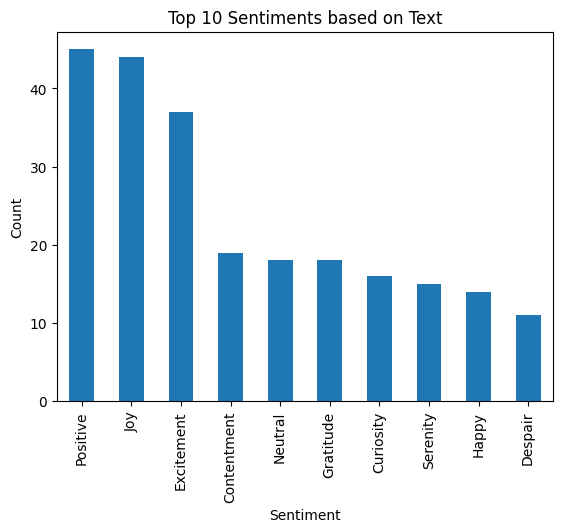

In [16]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Twitter,243
Facebook,231


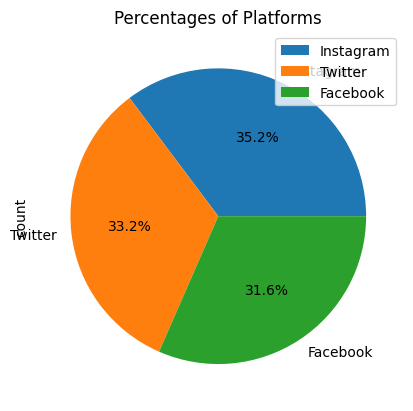

In [18]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()


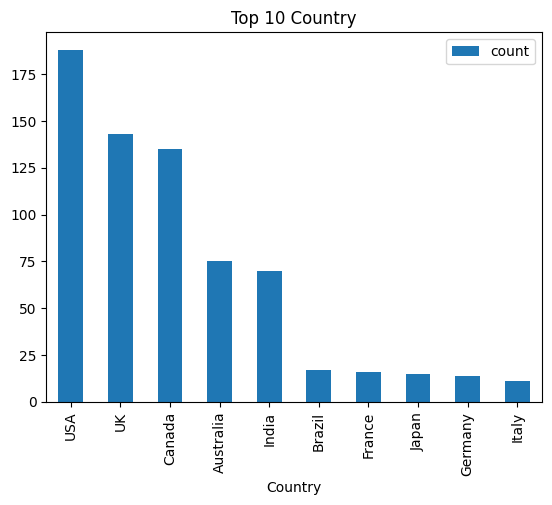

In [19]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

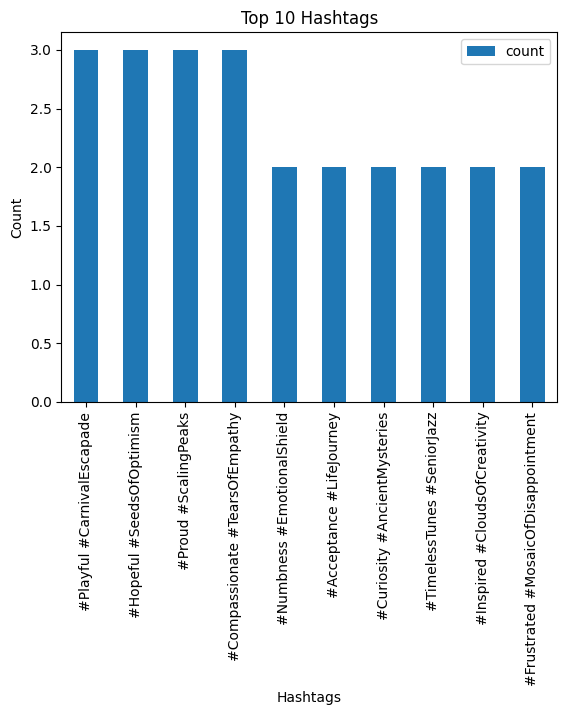

In [20]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [21]:
# Descrip data nurimucal
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [22]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")


Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


# Relationships between columns

### Q1:Top 10 hashtags retweeted
# **Answer**

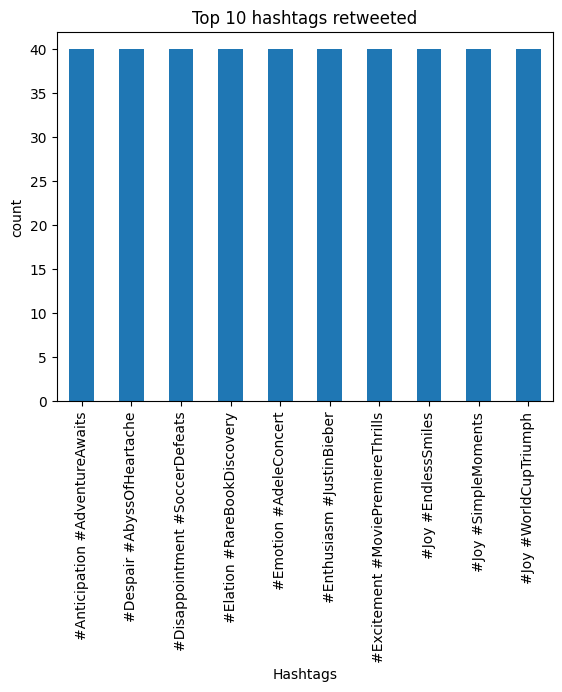

In [23]:
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Q2: What is platform top liked by users?
## **Answer**

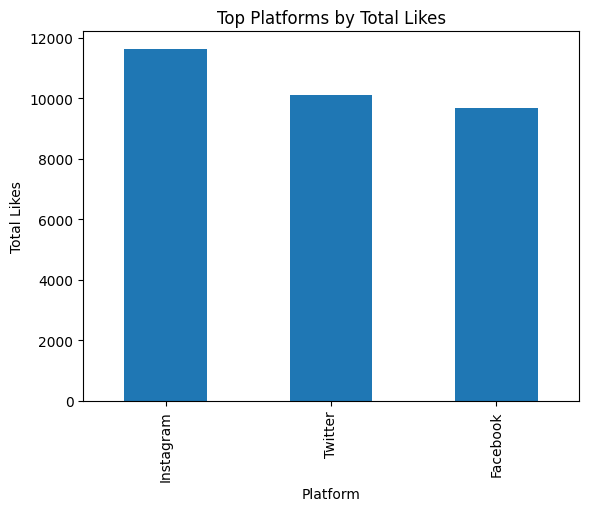

In [24]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

### Q3: What is the most country liked posts
## **Answer**

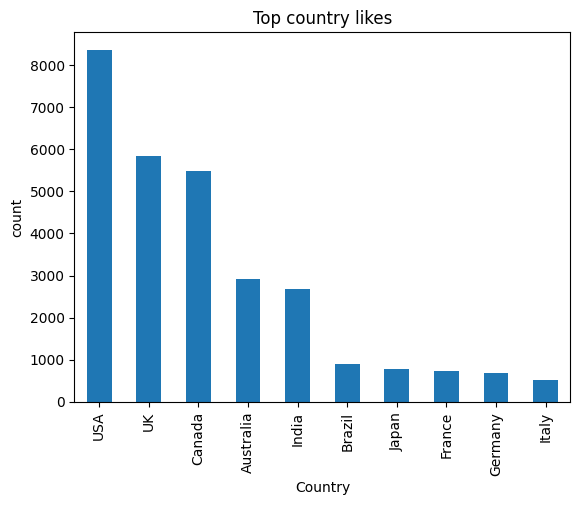

In [25]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

## I will segment users for each platform

In [26]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

# **Facebook**


### Top 10 hashtags retweeted

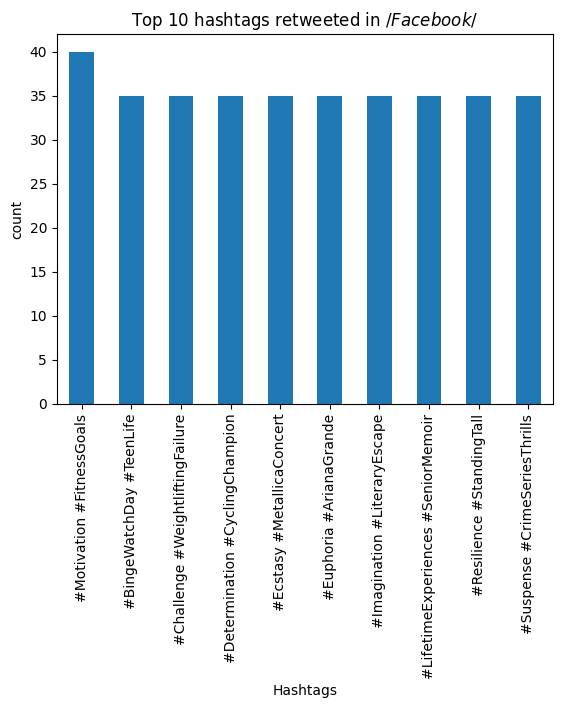

In [27]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Q2: Who User liked mostly ?

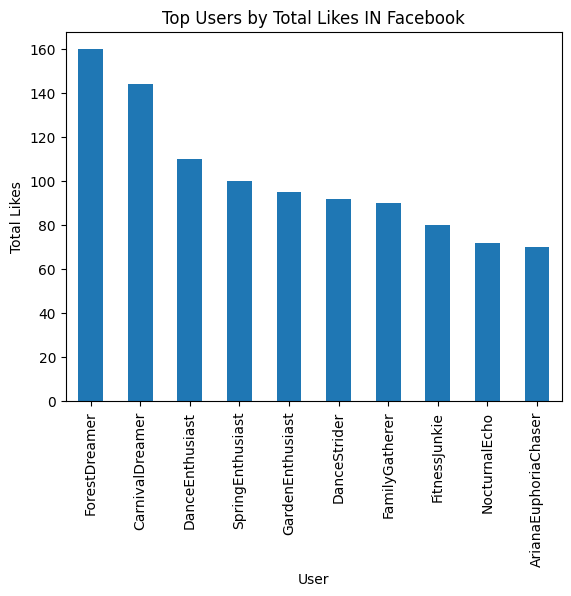

In [28]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

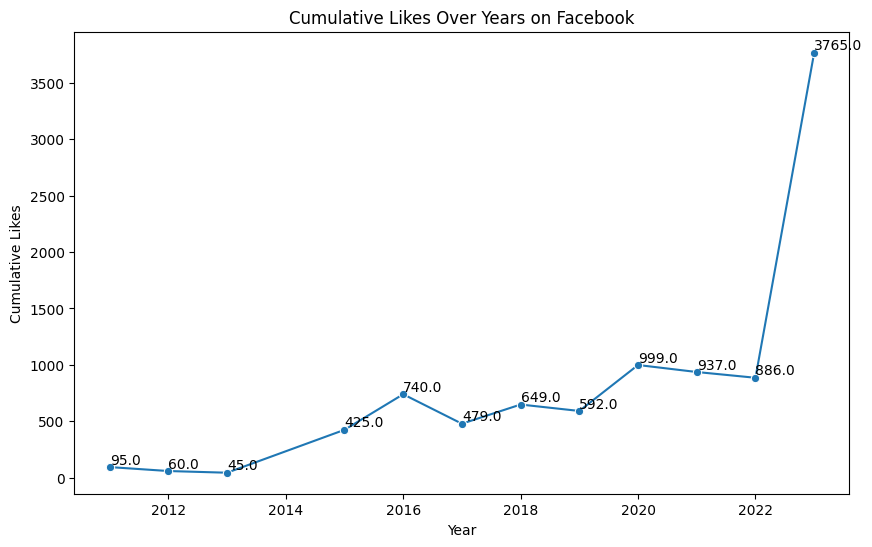

In [29]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

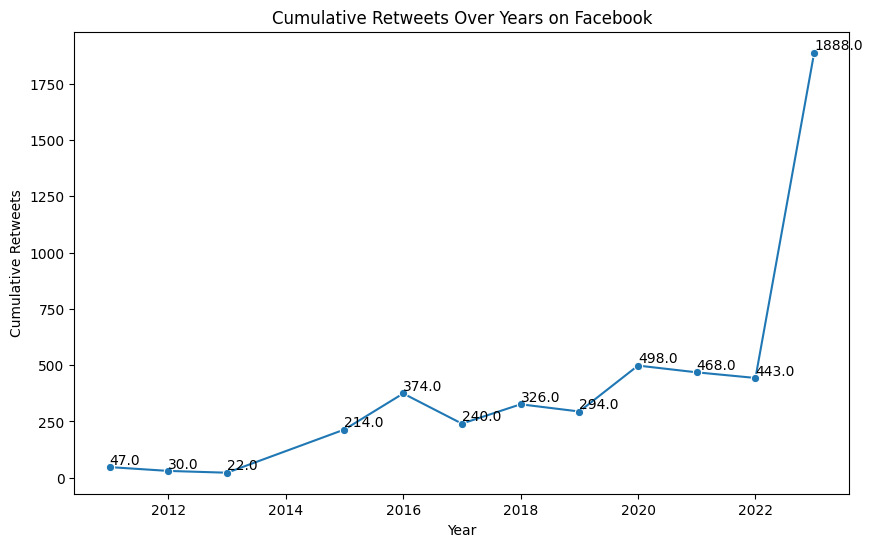

In [30]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# **Twitter**

### Top 10 hashtags retweeted

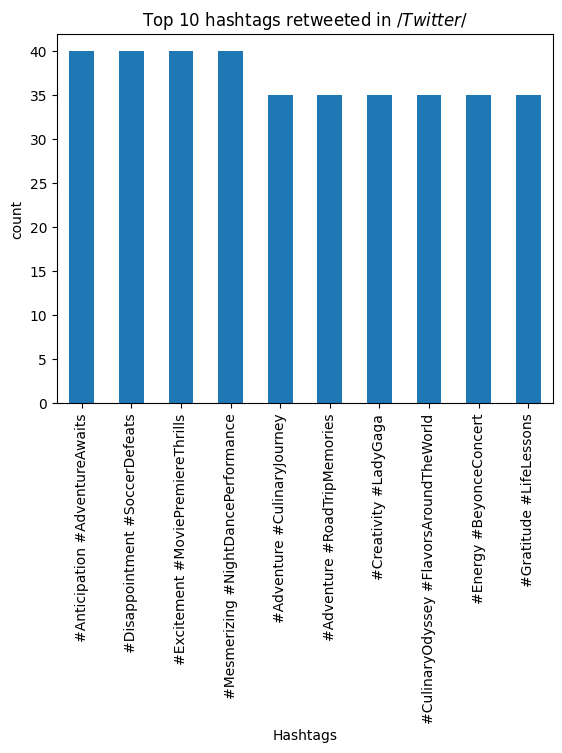

In [31]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Q2: Who User liked mostly ?

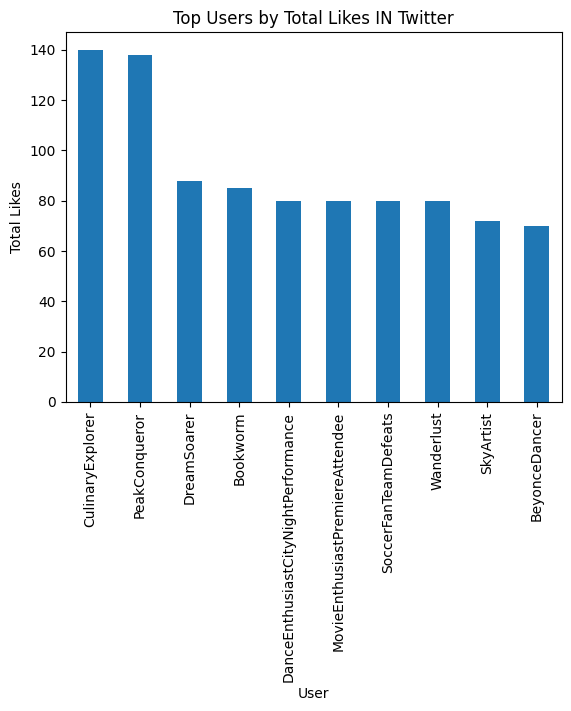

In [32]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

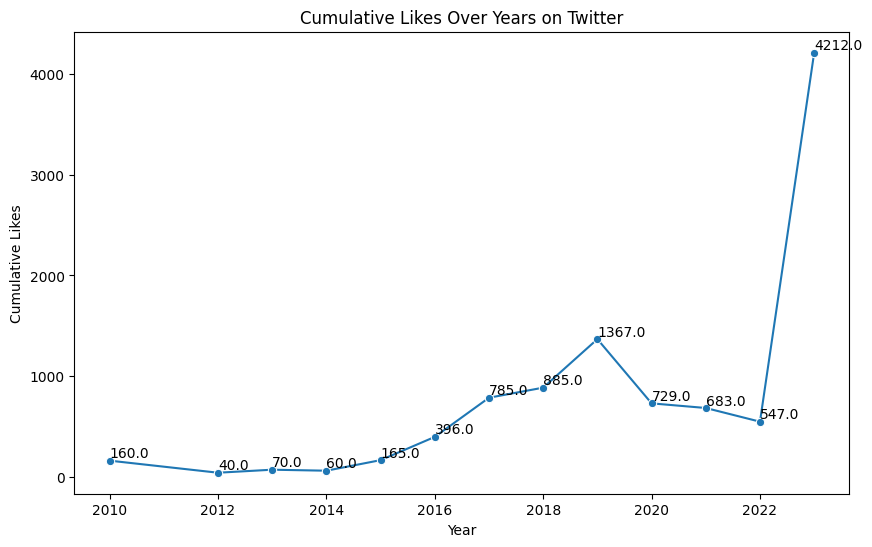

In [33]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

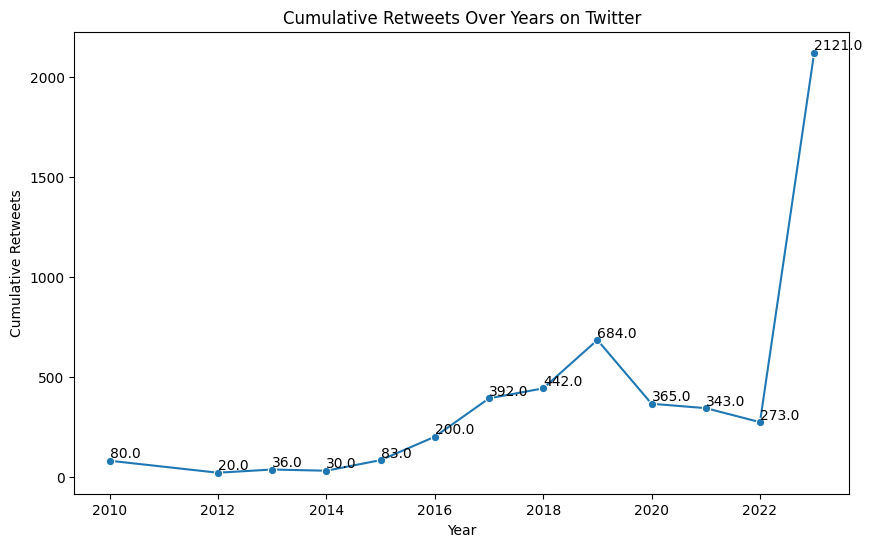

In [34]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# **Instagram**

### Top 10 hashtags retweeted

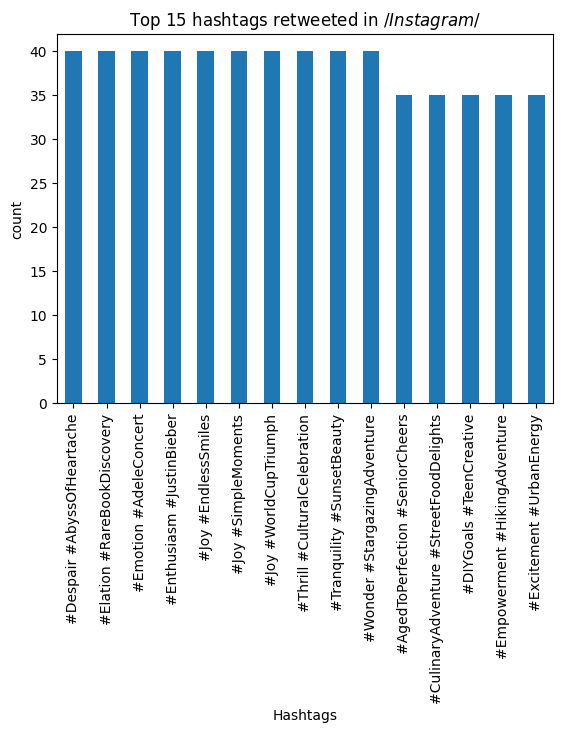

In [35]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Q2: Who User liked mostly ?

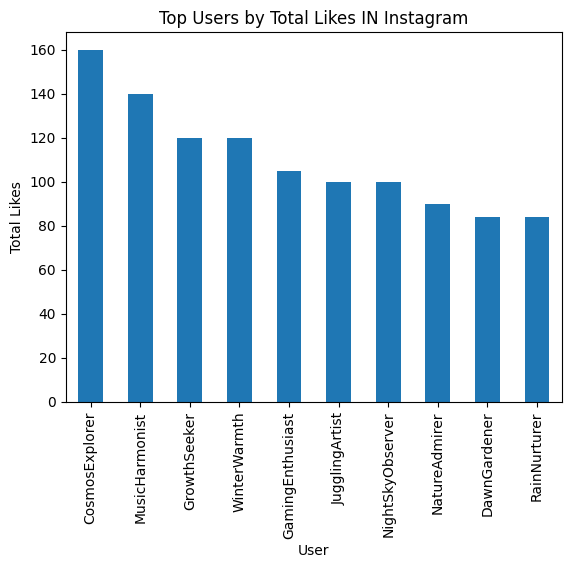

In [36]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

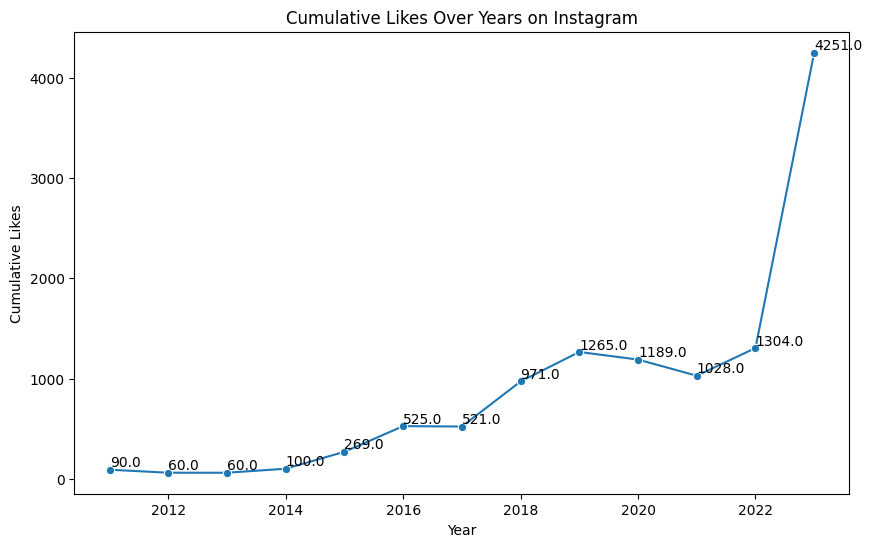

In [37]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

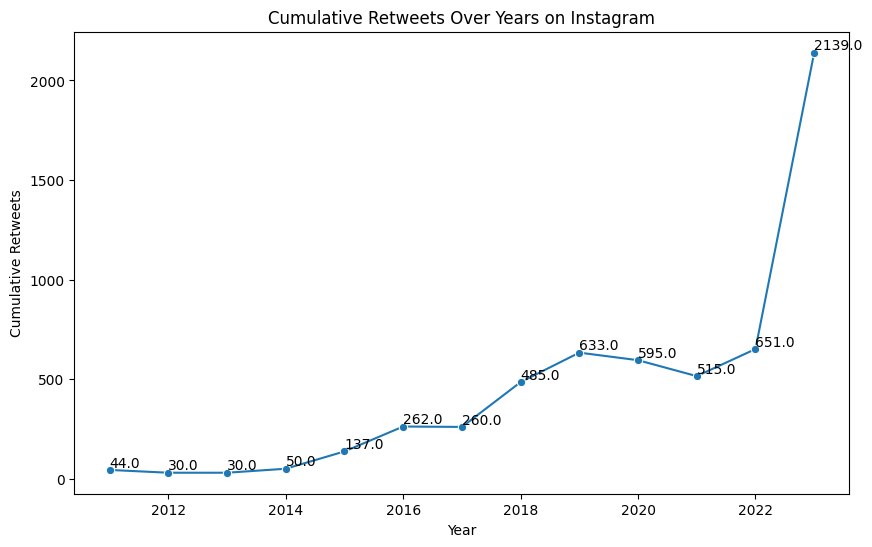

In [38]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

In [39]:
# Sentiment Prediction Model Training
print("============================================")
print("TRAINING SENTIMENT PREDICTION MODEL")
print("============================================")

TRAINING SENTIMENT PREDICTION MODEL


In [40]:
# Import required libraries for text processing and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [41]:
# Download necessary NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

True

In [42]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download ALL required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')  # Specific resource for abbreviation handling
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    """Clean and prepare text for model training"""
    # Convert to lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove emoji and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize with proper resources
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing text data...")
df['processed_text'] = df['Text'].apply(preprocess_text)

Preprocessing text data...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
# Print examples of processed text
print("\nExamples of preprocessed text:")
for i in range(3):
    print(f"Original: {df['Text'].iloc[i]}")
    print(f"Processed: {df['processed_text'].iloc[i]}")
    print(f"Sentiment: {df['Sentiment'].iloc[i]}\n")

# Define features and target variable
X = df['processed_text']
y = df['Sentiment']


Examples of preprocessed text:
Original: Enjoying a beautiful day at the park!
Processed: enjoying beautiful day park
Sentiment: Positive

Original: Traffic was terrible this morning.
Processed: traffic terrible morning
Sentiment: Negative

Original: Just finished an amazing workout! 💪
Processed: finished amazing workout
Sentiment: Positive



In [44]:
# Vérifier la distribution des classes
print("Distribution des sentiments avant filtrage :")
print(df['Sentiment'].value_counts())

# Filtrer les classes avec moins de 2 échantillons
min_samples = 2
value_counts = df['Sentiment'].value_counts()
valid_classes = value_counts[value_counts >= min_samples].index
df_filtered = df[df['Sentiment'].isin(valid_classes)]

# Préparer les données filtrées
X = df_filtered['processed_text']
y = df_filtered['Sentiment']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintenant possible car toutes classes ont ≥2 échantillons
)

print(f"\nDonnées d'entraînement : {X_train.shape[0]} échantillons")
print(f"Données de test : {X_test.shape[0]} échantillons")

Distribution des sentiments avant filtrage :
Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64

Données d'entraînement : 522 échantillons
Données de test : 131 échantillons


In [45]:
# Create a machine learning pipeline
sentiment_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [46]:
# Train the model
print("\nTraining sentiment prediction model...")
sentiment_pipeline.fit(X_train, y_train)
print("Model training complete.")


Training sentiment prediction model...
Model training complete.


In [47]:
# Evaluate the model
print("\nEvaluating model performance...")
y_pred = sentiment_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Evaluating model performance...
Accuracy: 0.2595


In [48]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

    Acceptance       1.00      0.50      0.67         2
Accomplishment       0.00      0.00      0.00         1
    Admiration       0.00      0.00      0.00         1
     Adventure       0.00      0.00      0.00         1
   Ambivalence       1.00      1.00      1.00         1
     Amusement       0.00      0.00      0.00         1
  Anticipation       0.00      0.00      0.00         1
       Arousal       0.00      0.00      0.00         1
           Awe       0.00      0.00      0.00         2
           Bad       0.00      0.00      0.00         1
      Betrayal       0.00      0.00      0.00         1
        Bitter       0.00      0.00      0.00         1
    Bitterness       0.00      0.00      0.00         1
       Boredom       0.00      0.00      0.00         1
      Calmness       0.00      0.00      0.00         1
    Compassion       0.00      0.00      0.00         1
 Compassionate       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


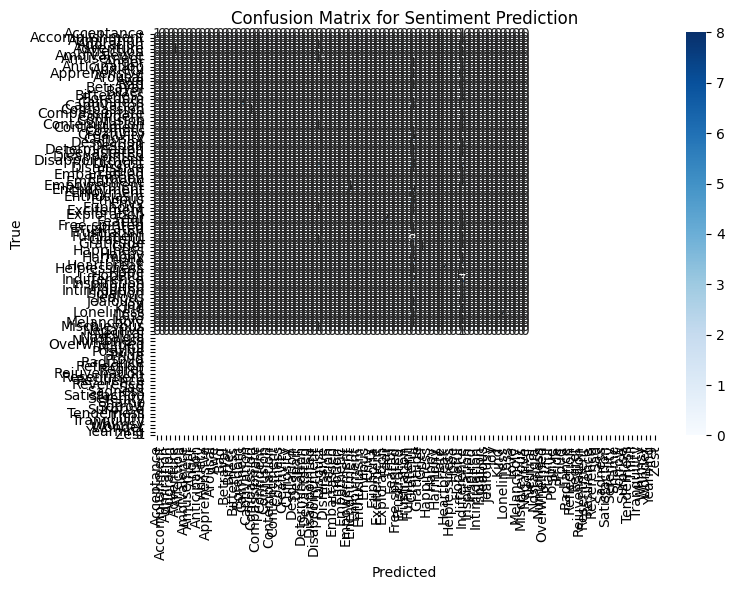

In [49]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sentiment Prediction')
plt.tight_layout()
plt.show()

In [50]:
# Function to predict sentiment of new posts
def predict_sentiment(text):
    """Predict the sentiment of a given text"""
    # Preprocess the text
    processed = preprocess_text(text)
    # Predict sentiment
    sentiment = sentiment_pipeline.predict([processed])[0]
    # Get prediction probability
    proba = sentiment_pipeline.predict_proba([processed])
    confidence = proba.max()

    return sentiment, confidence

In [51]:
 #Test the prediction function with sample posts
print("\nTesting sentiment prediction on sample posts:")
sample_posts = [
    "This product is absolutely terrible. I'm never buying it again!",
    "I'm not sure how I feel about this update. It's different but okay I guess.",
    "Wow! Best customer service I've ever experienced. Highly recommend!"

]

for post in sample_posts:
    sentiment, confidence = predict_sentiment(post)
    print(f"\nPost: {post}")
    print(f"Predicted sentiment: {sentiment} (Confidence: {confidence:.2%})")



Testing sentiment prediction on sample posts:

Post: This product is absolutely terrible. I'm never buying it again!
Predicted sentiment: Positive (Confidence: 6.24%)

Post: I'm not sure how I feel about this update. It's different but okay I guess.
Predicted sentiment: Positive (Confidence: 6.37%)

Post: Wow! Best customer service I've ever experienced. Highly recommend!
Predicted sentiment: Joy (Confidence: 7.02%)


In [52]:
# Function to perform batch prediction
def batch_predict_sentiments(texts):
    """Predict sentiments for a list of texts"""
    processed_texts = [preprocess_text(text) for text in texts]
    predictions = sentiment_pipeline.predict(processed_texts)
    probabilities = sentiment_pipeline.predict_proba(processed_texts).max(axis=1)

    return predictions, probabilities

In [53]:
# Save the model for future use
import joblib
print("\nSaving sentiment prediction model...")
joblib.dump(sentiment_pipeline, 'sentiment_model.pkl')
print("Model saved as 'sentiment_model.pkl'")


Saving sentiment prediction model...
Model saved as 'sentiment_model.pkl'


In [54]:
# Create a simple prediction function for real-time usage
def analyze_post(text, user=None, platform=None):
    """Analyze a social media post and return sentiment information"""
    sentiment, confidence = predict_sentiment(text)

    result = {
        'Text': text,
        'Predicted_Sentiment': sentiment,
        'Confidence': f'{confidence:.2%}',
    }

    if user:
        result['User'] = user
    if platform:
        result['Platform'] = platform

    return result

In [55]:
# Create a simple interactive prediction interface
print("\nInteractive Sentiment Predictor Demo:")
from IPython.display import display
import ipywidgets as widgets

text_input = widgets.Textarea(
    value='',
    placeholder='Enter text to analyze sentiment',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='100px')
)

platform_dropdown = widgets.Dropdown(
    options=['Twitter', 'Facebook', 'Instagram'],
    value='Twitter',
    description='Platform:',
    disabled=False,
)

output = widgets.Output()

button = widgets.Button(
    description='Predict Sentiment',
    button_style='primary',
    tooltip='Click to predict sentiment'
)

def on_button_clicked(b):
    with output:
        output.clear_output()
        if text_input.value:
            result = analyze_post(text_input.value, platform=platform_dropdown.value)
            print(f"Text: {result['Text']}")
            print(f"Platform: {result['Platform']}")
            print(f"Predicted Sentiment: {result['Predicted_Sentiment']}")
            print(f"Confidence: {result['Confidence']}")
        else:
            print("Please enter some text to analyze.")

button.on_click(on_button_clicked)

print("Use the text area below to enter text and click the button to predict sentiment.")
display(text_input)
display(platform_dropdown)
display(button)
display(output)


Interactive Sentiment Predictor Demo:
Use the text area below to enter text and click the button to predict sentiment.


Textarea(value='', description='Text:', layout=Layout(height='100px', width='800px'), placeholder='Enter text …

Dropdown(description='Platform:', options=('Twitter', 'Facebook', 'Instagram'), value='Twitter')

Button(button_style='primary', description='Predict Sentiment', style=ButtonStyle(), tooltip='Click to predict…

Output()

In [56]:
# Enhanced text preprocessing function
def enhanced_preprocess_text(text):
    """Enhanced version of text preprocessing"""
    # Convert to lowercase
    text = str(text).lower()

    # Keep important punctuation but remove others
    text = re.sub(r'[^\w\s!?.,]', ' ', text)

    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords but keep negation words (important for sentiment)
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor', 'neither', 'never', 'none', 'nobody'}
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [57]:
# Function to simplify sentiment labels by grouping them
def simplify_sentiment(sentiment):
    """Group similar sentiments into broader categories"""
    # Positive sentiments
    positive_sentiments = ['Joy', 'Excitement', 'Happiness', 'Happy', 'Contentment', 'Satisfaction',
                         'Positive', 'Grateful', 'Gratitude', 'Love', 'Enthusiasm', 'Euphoria',
                         'Elation', 'Accomplishment', 'Pride', 'Proud', 'Hope', 'Hopeful', 'Playful']

    # Negative sentiments
    negative_sentiments = ['Sadness', 'Sad', 'Anger', 'Frustrated', 'Frustration', 'Disappointment',
                         'Negative', 'Fear', 'Fearful', 'Anxiety', 'Grief', 'Heartbreak', 'Hate',
                         'Despair', 'Regret', 'Shame', 'Devastated', 'Loneliness', 'Bitterness', 'Bitter']

    # Neutral sentiments
    neutral_sentiments = ['Neutral', 'Ambivalence', 'Confusion', 'Indifference', 'Reflection', 'Surprise']

    # Map sentiment to simplified category
    if sentiment in positive_sentiments or 'joy' in sentiment.lower() or 'excite' in sentiment.lower() or 'happy' in sentiment.lower():
        return 'Positive'
    elif sentiment in negative_sentiments or 'sad' in sentiment.lower() or 'anger' in sentiment.lower() or 'fear' in sentiment.lower():
        return 'Negative'
    elif sentiment in neutral_sentiments or 'calm' in sentiment.lower() or 'curious' in sentiment.lower():
        return 'Neutral'
    else:
        # Further classification based on words in the sentiment name
        if any(pos in sentiment.lower() for pos in ['wonder', 'awe', 'amaze', 'content', 'fulfill', 'nostalg', 'serene', 'proud']):
            return 'Positive'
        elif any(neg in sentiment.lower() for neg in ['desolat', 'lone', 'overwhelm', 'reject', 'jealous', 'resentment', 'numb']):
            return 'Negative'
        else:
            return 'Neutral'  # Default to neutral if can't be mapped

In [58]:
# Apply enhanced preprocessing
print("Applying enhanced preprocessing...")
df['enhanced_text'] = df['Text'].apply(enhanced_preprocess_text)

# Simplify sentiment labels
print("Simplifying sentiment labels...")
df['simplified_sentiment'] = df['Sentiment'].apply(simplify_sentiment)

# Print distribution of simplified sentiments
print("\nDistribution of simplified sentiments:")
print(df['simplified_sentiment'].value_counts())

Applying enhanced preprocessing...
Simplifying sentiment labels...

Distribution of simplified sentiments:
simplified_sentiment
Neutral     330
Positive    284
Negative    118
Name: count, dtype: int64


In [59]:
# Define features and target variable with improved data
X = df['enhanced_text']
y = df['simplified_sentiment']  # Use simplified sentiments

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining data: {X_train.shape[0]} samples")
print(f"Test data: {X_test.shape[0]} samples")


Training data: 585 samples
Test data: 147 samples


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import sklearn's GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create a better ML pipeline
sentiment_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
    ('classifier', SVC(probability=True))
])

# Parameters for grid search
param_grid = {
    'vectorizer__max_features': [3000, 5000],
    'vectorizer__min_df': [2, 3],
    'classifier__C': [1, 10],
    'classifier__gamma': ['scale'],
    'classifier__kernel': ['rbf', 'linear']
}

# Grid search to find best parameters
grid_search = GridSearchCV(
    sentiment_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train the model with grid search
print("\nTraining sentiment prediction model with hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Model training complete.")

# Get best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Training sentiment prediction model with hyperparameter tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Model training complete.
Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'vectorizer__max_features': 3000, 'vectorizer__min_df': 3}



Evaluating model performance...
Accuracy: 0.7279

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.46      0.59        24
     Neutral       0.68      0.77      0.72        66
    Positive       0.76      0.79      0.78        57

    accuracy                           0.73       147
   macro avg       0.76      0.67      0.70       147
weighted avg       0.74      0.73      0.72       147



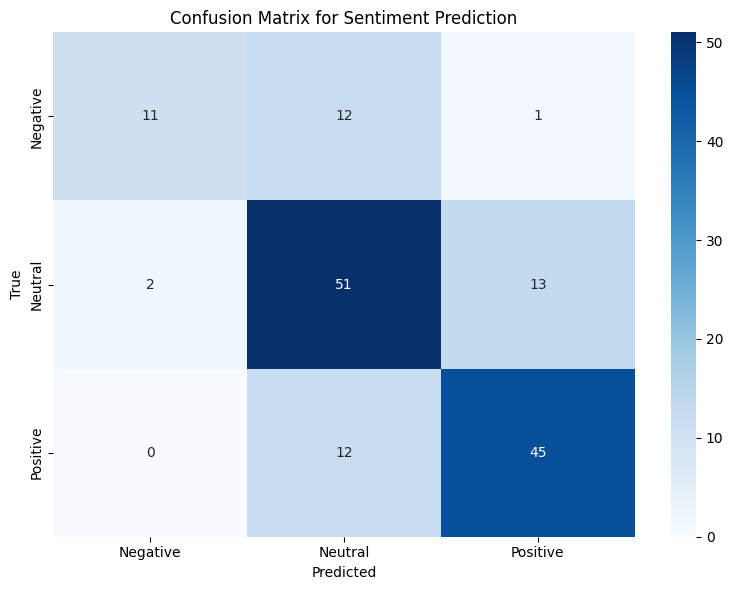

In [61]:
# Evaluate the model
print("\nEvaluating model performance...")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sentiment Prediction')
plt.tight_layout()
plt.show()

In [62]:
# Save the model for future use
print("\nSaving sentiment prediction model...")
joblib.dump(best_model, 'improved_sentiment_model.pkl')
print("Model saved as 'improved_sentiment_model.pkl'")

# Updated prediction function
def predict_sentiment(text, model=best_model):
    """Predict the sentiment of a given text using the improved model"""
    # Preprocess the text
    processed = enhanced_preprocess_text(text)

    # Predict sentiment
    sentiment = model.predict([processed])[0]

    # Get prediction probability
    proba = model.predict_proba([processed])
    confidence = proba.max()

    return sentiment, confidence


Saving sentiment prediction model...
Model saved as 'improved_sentiment_model.pkl'


In [63]:
 #Test the prediction function with sample posts
print("\nTesting sentiment prediction on sample posts:")
sample_posts = [
    "This product is bad!",
    "I'm not sure how I feel about this update. It's different but okay I guess.",
    "Wow! Best customer service I've ever experienced. Highly recommend!"

]

for post in sample_posts:
    sentiment, confidence = predict_sentiment(post)
    print(f"\nPost: {post}")
    print(f"Predicted sentiment: {sentiment} (Confidence: {confidence:.2%})")


Testing sentiment prediction on sample posts:

Post: This product is bad!
Predicted sentiment: Neutral (Confidence: 90.63%)

Post: I'm not sure how I feel about this update. It's different but okay I guess.
Predicted sentiment: Neutral (Confidence: 55.40%)

Post: Wow! Best customer service I've ever experienced. Highly recommend!
Predicted sentiment: Positive (Confidence: 88.52%)


try to improve model accuracy



In [64]:
from textblob import TextBlob

def enhanced_preprocess_text(text):
    """Improved preprocessing with spelling correction and negation handling"""
    # Spelling correction
    text = str(TextBlob(text).correct())

    # Handle negation
    text = re.sub(r'\b(not|no|never)\s+(\w+)', r'\1_\2', text)

    # Keep important punctuation
    text = re.sub(r'[^\w\s!?]', '', text)

    # Rest of preprocessing (lemmatization, etc.)
    # ... (keep previous preprocessing steps)
    return processed_text

In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

# Modify your pipeline
sentiment_pipeline = imbPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(class_weight='balanced', probability=True))
])

In [66]:
from sklearn.preprocessing import LabelEncoder

# Encoder les étiquettes en entiers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Combine text features with metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'processed_text'),
        ('num', StandardScaler(), ['Retweets', 'Likes'])
    ]
)

# Update pipeline
sentiment_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [69]:
# Save the model for future use
print("\nSaving sentiment prediction model...")
joblib.dump(model, 'final_sentiment_model.pkl')
print("Model saved as 'improved_sentiment_model.pkl'")

# Updated prediction function
def predict_sentiment(text, model=model):
    """Predict the sentiment of a given text using the improved model"""
    # Preprocess the text
    processed = enhanced_preprocess_text(text)

    # Predict sentiment
    sentiment = model.predict([processed])[0]

    # Get prediction probability
    proba = model.predict_proba([processed])
    confidence = proba.max()

    return sentiment, confidence


Saving sentiment prediction model...


/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Model saved as 'improved_sentiment_model.pkl'


In [70]:
le = LabelEncoder()
le.fit(df['simplified_sentiment'])  # Fit on your training labels

LabelEncoder()

In [71]:
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download(['punkt', 'stopwords', 'wordnet'], quiet=True)

def enhanced_preprocess_text(text):
    """Advanced preprocessing with spelling correction and negation handling"""

    # Convert to string and lowercase
    text = str(text).lower()

    # Spelling correction
    text = str(TextBlob(text).correct())

    # Handle negation patterns (preserve negation context)
    text = re.sub(r'\b(not|no|never)\s+(\w+)', r'\1_\2', text)

    # Keep relevant punctuation and remove special characters
    text = re.sub(r'[^\w\s!?_]', '', text)  # Preserve underscores from negation handling

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords while preserving negation-related words
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'never'}
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruct text
    processed_text = ' '.join(tokens)

    return processed_text

In [72]:
def predict_sentiment(text, model=model, tokenizer=tokenizer):
    """Predict sentiment using BERT model"""
    # Preprocess text
    processed = enhanced_preprocess_text(text)

    # Tokenize with BERT format
    inputs = tokenizer(
        processed,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="tf"
    )

    # Get predictions
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=1)
    confidence = tf.reduce_max(probs).numpy()
    pred_label = tf.argmax(probs, axis=1).numpy()[0]

    # Convert back to text label
    sentiment = le.inverse_transform([pred_label])[0]

    return sentiment, confidence

In [73]:


def predict_sentiment(text):
    """Predict sentiment using BERT model with proper preprocessing"""
    # Enhanced preprocessing
    processed_text = enhanced_preprocess_text(text)

    # BERT tokenization
    inputs = tokenizer(
        processed_text,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="tf"
    )

    # Get predictions
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=1)
    confidence = tf.reduce_max(probs).numpy()
    pred_label = tf.argmax(probs, axis=1).numpy()[0]

    # Convert numeric label to text
    sentiment = le.inverse_transform([pred_label])[0]

    return sentiment, f"{confidence:.2%}"

# Now run the test
print("\nTesting sentiment prediction on sample posts:")
sample_posts = [
    "This product is bad!",
    "I'm not sure how I feel about this update. It's different but okay I guess.",
    "Wow! Best customer service I've ever experienced. Highly recommend!"
]

for post in sample_posts:
    sentiment, confidence = predict_sentiment(post)
    print(f"\nPost: {post}")
    print(f"Predicted sentiment: {sentiment} (Confidence: {confidence})")


Testing sentiment prediction on sample posts:

Post: This product is bad!
Predicted sentiment: Negative (Confidence: 41.87%)

Post: I'm not sure how I feel about this update. It's different but okay I guess.
Predicted sentiment: Negative (Confidence: 43.96%)

Post: Wow! Best customer service I've ever experienced. Highly recommend!
Predicted sentiment: Negative (Confidence: 40.94%)


In [74]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# 1. Initialize BERT with TensorFlow weights
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,
    from_pt=False  # Critical fix: Use TensorFlow weights
)

# 2. Label Encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 3. Class Weight Calculation
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)
class_weight_dict = dict(enumerate(class_weights))

# 4. Improved Tokenization Function
def bert_tokenize(texts):
    return tokenizer(
        texts.tolist(),
        padding='max_length',  # Consistent padding
        truncation=True,
        max_length=128,
        return_tensors="tf"
    )

# 5. Data Preparation
train_encodings = bert_tokenize(X_train)
test_encodings = bert_tokenize(X_test)

# 6. Model Configuration
optimizer = tf.keras.optimizers.Adam(3e-5)  # Lower learning rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# 7. Enhanced Training
history = model.fit(
    train_encodings.data,
    y_train_enc,
    validation_data=(test_encodings.data, y_test_enc),
    epochs=10,  # Increased epochs
    batch_size=32,
    class_weight=class_weight_dict  # Handle imbalance
)

# 8. Prediction Function
def predict_sentiment(text):
    # Preprocess text
    processed = enhanced_preprocess_text(text)

    # Tokenize with same parameters
    inputs = tokenizer(
        processed,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors="tf"
    )

    # Predict
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=1)
    confidence = np.max(probs)
    prediction = np.argmax(probs)

    return le.inverse_transform([prediction])[0], confidence

# 9. Test Cases
test_cases = [
    "This product is bad!",
    "I'm not sure how I feel about this update. It's different but okay I guess.",
    "Wow! Best customer service I've ever experienced. Highly recommend!"
]

for text in test_cases:
    sentiment, confidence = predict_sentiment(text)
    print(f"Text: {text}")
    print(f"Predicted: {sentiment} ({confidence:.2%})")
    print("---")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
19/19 [==============================] - 60s 1s/step - loss: 1.0294 - accuracy: 0.4615 - val_loss: 0.9015 - val_accuracy: 0.5510
Epoch 2/10
19/19 [==============================] - 16s 836ms/step - loss: 0.6924 - accuracy: 0.6632 - val_loss: 0.6913 - val_accuracy: 0.6599
Epoch 3/10
19/19 [==============================] - 17s 912ms/step - loss: 0.4379 - accuracy: 0.8034 - val_loss: 0.5547 - val_accuracy: 0.7483
Epoch 4/10
19/19 [==============================] - 16s 829ms/step - loss: 0.2578 - accuracy: 0.9043 - val_loss: 0.5247 - val_accuracy: 0.8027
Epoch 5/10
19/19 [==============================] - 17s 891ms/step - loss: 0.1488 - accuracy: 0.9538 - val_loss: 0.5612 - val_accuracy: 0.7891
Epoch 6/10
19/19 [==============================] - 16s 823ms/step - loss: 0.0934 - accuracy: 0.9692 - val_loss: 0.6698 - val_accuracy: 0.7687
Epoch 7/10
19/19 [==============================] - 17s 894ms/step - loss: 0.0878 - accuracy: 0.9641 - val_loss: 0.5118 - val_accuracy: 0.8503
Ep